In [20]:
import torch
from past.builtins import reduce
from torch.distributions import Normal
import numpy as np

In [11]:
N = Normal(loc=torch.tensor(0.5, dtype=torch.float), 
           scale=torch.tensor(1, dtype=torch.float))


In [13]:
print(N.log_prob(torch.tensor(0.1, dtype=torch.float)))
print(-((0.1 - 0.5)**2 / (2 * 1))  - np.log(2 * np.pi * 1))

tensor(-0.9989)
-0.08000000000000002


In [16]:
T = torch.tensor([6, 3])
print(2*T)

for i in reversed(range(20)):
    print(i)

tensor([12,  6])


In [44]:
seq = torch.tensor([1, 2, 3, 4], dtype=torch.float)
target_cs = torch.cumsum(seq, dim=0) 
target_loop = torch.zeros_like(seq)
for i in range(seq.shape[0] - 1):
    target_loop[i] = torch.sum(seq[:i+1])
    

In [38]:
torch.sum(seq[:2])



tensor(3.)

In [62]:
t = torch.tensor([1,2,3,4], dtype=torch.float).expand(3,4)
print(t)



tensor([[1., 2., 3., 4.],
        [1., 2., 3., 4.],
        [1., 2., 3., 4.]])


In [66]:
print(t[0,:])
print(t[0,:].flip(dims=[0]))


tensor([1., 2., 3., 4.])
tensor([4., 3., 2., 1.])


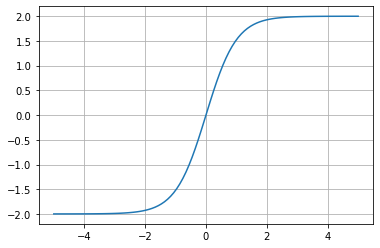

In [6]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.linspace(-5, 5, 100), 2* np.tanh(np.linspace(-5, 5, 100)))
plt.grid()

In [1]:
from continous_action_RL.actor_critic_networks import Actor
actor = Actor(num_actions=1,
              num_obs=3,
              mean_scale=1,
              std_low=0.01,
              std_high=1,
              action_bound=(-2, 2))


In [4]:
for name, parameters in actor.named_parameters():
    print(name)
    print(parameters)

input.weight
Parameter containing:
tensor([[-0.5306,  0.4121,  0.3737],
        [ 0.2035, -0.1478, -0.0117],
        [-0.2747, -0.3961,  0.5603],
        [-0.2620,  0.3450,  0.3055],
        [ 0.1071,  0.2254, -0.0064],
        [-0.3258,  0.0852,  0.1425],
        [-0.4930, -0.4460, -0.4599],
        [-0.3996, -0.0039,  0.0321],
        [-0.2596, -0.1749,  0.2594],
        [ 0.1824,  0.1583,  0.0616],
        [ 0.5164, -0.1159,  0.2100],
        [-0.5503,  0.1610, -0.1164],
        [-0.5679,  0.5714, -0.0059],
        [-0.0462, -0.0511, -0.5025],
        [ 0.5197, -0.1071,  0.5648],
        [ 0.1332, -0.2351,  0.3298],
        [ 0.5757, -0.0442,  0.0828],
        [-0.2413, -0.1948, -0.0498],
        [ 0.4846, -0.0598,  0.3251],
        [ 0.3830,  0.2789,  0.2153],
        [-0.0901, -0.5120, -0.3767],
        [-0.5170, -0.1353, -0.1239],
        [-0.3548,  0.4458,  0.0289],
        [-0.0783, -0.1651, -0.2816],
        [ 0.3894, -0.5014, -0.2283],
        [-0.4817, -0.4661, -0.0141],
   

In [5]:
for index, weight in actor.named_parameters():
    gradient, *_ = weight.grad.data

AttributeError: 'NoneType' object has no attribute 'data'

In [12]:
import torch
import gym

env = gym.make("Pendulum-v0")


obs = env.reset()
actor(torch.tensor(obs, dtype=torch.float))

/Users/blessing/PycharmProjects/ContinousActionRL/carl/lib/python3.7/site-packages/torch/nn/functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


(tensor(0.2058, grad_fn=<ClampBackward>),
 tensor(-1.7994, grad_fn=<DivBackward0>))

In [15]:
import torch as th
t = torch.tensor((1,2,3,4)).expand(3,4)
print(t)

tensor([[1, 2, 3, 4],
        [1, 2, 3, 4],
        [1, 2, 3, 4]])


In [16]:
print(th.flip(th.cumsum(th.flip(t, [1]), 1), [1]))

tensor([[10,  9,  7,  4],
        [10,  9,  7,  4],
        [10,  9,  7,  4]])


NameError: name 'rl2cumsum' is not defined

In [17]:
def cumsum_reversed(sequence):
    return torch.flip(torch.cumsum(torch.flip(sequence, [1]), 1), [1])

def reverse_sequence(sequence, num_sequences, dim=0):
    sequence = sequence.unsqueeze(2)
    for i in range(num_sequences):
        sequence[i, :] = sequence[i, :].flip(dims=[dim])
    return sequence.squeeze(-1)


In [21]:
t = torch.tensor((1,2,3,4)).expand(3,4)
print(cumsum_reversed(t))
print(torch.cumsum(reverse_sequence(t, 3), dim=1))


tensor([[10,  9,  7,  4],
        [10,  9,  7,  4],
        [10,  9,  7,  4]])
tensor([[ 4,  7,  9, 10],
        [ 4,  7,  9, 10],
        [ 4,  7,  9, 10]])


In [30]:
def cumprod_reversed(sequence):
    return torch.flip(torch.cumprod(sequence, 1), [1])


print(cumprod_reversed(t))
print(reverse_sequence(torch.cumprod(t, dim=1),3))

tensor([[24,  6,  2,  1],
        [24,  6,  2,  1],
        [24,  6,  2,  1]])
tensor([[24,  6,  2,  1],
        [24,  6,  2,  1],
        [24,  6,  2,  1]])


In [36]:
from torch.distributions import Normal
print(Normal(loc=1, scale=0).sample())

tensor(1.)


In [40]:
import torch
w = torch.empty(3, 5)
print(torch.nn.init.orthogonal_(w))

w = torch.empty(300, 500)



tensor([[ 0.2922,  0.1609, -0.6698, -0.3805, -0.5435],
        [-0.6818,  0.3710,  0.3127, -0.1772, -0.5181],
        [-0.4785, -0.8220, -0.2821, -0.0668, -0.1063]])
tensor([[ 0.1652,  0.0596, -0.2699,  ..., -0.0277, -0.1337,  0.4164],
        [-0.3586, -0.1359, -0.1695,  ..., -0.0384,  0.0128, -0.3585],
        [-0.1484,  0.0308, -0.0086,  ..., -0.1775, -0.0721,  0.0364],
        ...,
        [-0.3238, -0.0804, -0.0114,  ..., -0.1628,  0.2270, -0.1142],
        [-0.0722, -0.1598,  0.1941,  ...,  0.3712,  0.0247, -0.1721],
        [-0.1228,  0.1130, -0.0046,  ..., -0.0567, -0.3834,  0.0311]])


In [1]:
import torch
import numpy as np
import sys

/Users/blessing/PycharmProjects/ContinousActionRL/carl/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/blessing/PycharmProjects/ContinousActionRL/carl/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/blessing/PycharmProjects/ContinousActionRL/carl/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", n

In [43]:
elems = tf.convert_to_tensor([1, 2, 3, 4, 5, 6])
elems2 = tf.convert_to_tensor([1, 2, 3, 4, 5, 6])

with tf.Session() as sess:
    print(tf.scan(lambda a, x: x + a,
            elems).eval())
    

[ 1  3  6 10 15 21]


In [33]:
elems = np.array([1, 2, 3, 4])
for i in range(len(elems), -1, -1):

print(elems)

4
3
2
1
0
[1 2 3 4]


In [37]:
elems = tf.convert_to_tensor([1, 2, 3, 4, 5, 6])
elems2 = tf.convert_to_tensor([1, 2, 3, 4, 5, 6])

with tf.Session() as sess:
    print(tf.scan(lambda a, x: x + a,
            [elems, elems2]).eval())

ValueError: The two structures don't have the same nested structure.

First structure: type=list str=[<tf.Tensor 'Const_2:0' shape=(6,) dtype=int32>, <tf.Tensor 'Const_3:0' shape=(6,) dtype=int32>]

Second structure: type=list str=[<tf.Tensor 'scan_14/while/TensorArrayReadV3:0' shape=() dtype=int32>, <tf.Tensor 'scan_14/while/TensorArrayReadV3_1:0' shape=() dtype=int32>, <tf.Tensor 'scan_14/while/Identity_2:0' shape=() dtype=int32>, <tf.Tensor 'scan_14/while/Identity_3:0' shape=() dtype=int32>]

More specifically: The two structures don't have the same number of elements. First structure: type=list str=[<tf.Tensor 'Const_2:0' shape=(6,) dtype=int32>, <tf.Tensor 'Const_3:0' shape=(6,) dtype=int32>]. Second structure: type=list str=[<tf.Tensor 'scan_14/while/TensorArrayReadV3:0' shape=() dtype=int32>, <tf.Tensor 'scan_14/while/TensorArrayReadV3_1:0' shape=() dtype=int32>, <tf.Tensor 'scan_14/while/Identity_2:0' shape=() dtype=int32>, <tf.Tensor 'scan_14/while/Identity_3:0' shape=() dtype=int32>]
Entire first structure:
[., .]
Entire second structure:
[., ., ., .]

In [4]:
for i in reversed(range(1,20)):
    print(i)





19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1


In [ ]:
def printer():
    print("Hi")


In [ ]:
for i in range(10):
    printer()


In [2]:
import numpy as np
a = [1,-1, 1]
b = [2,-2, 2]
print(np.linspace(a, b, 10))


[[ 1.         -1.          1.        ]
 [ 1.11111111 -1.11111111  1.11111111]
 [ 1.22222222 -1.22222222  1.22222222]
 [ 1.33333333 -1.33333333  1.33333333]
 [ 1.44444444 -1.44444444  1.44444444]
 [ 1.55555556 -1.55555556  1.55555556]
 [ 1.66666667 -1.66666667  1.66666667]
 [ 1.77777778 -1.77777778  1.77777778]
 [ 1.88888889 -1.88888889  1.88888889]
 [ 2.         -2.          2.        ]]


In [4]:
import torch


NameError: name 'nan' is not defined

In [ ]:
for i in range(10):
    pass



In [4]:
import torch

t1 = torch.tensor(4)
t2 = torch.tensor(4)

t1.pow(2)
t2.pow_(2)

print(t1)
print(t2)




tensor(4)
tensor(16)
